#Maintenance cost reduction through predictive techniques 
**BACKGROUND:** 
A company has a fleet of devices transmitting daily 
sensor readings. They would like to create a predictive maintenance 
solution to proactively identify when maintenance should be 
performed. This approach promises cost savings over routine or time-
based preventive maintenance, because tasks are performed only when 
warranted. 

**GOAL:**
You are tasked with building a predictive model using machine 
learning to predict the probability of a device failure. When building 
this model, be sure to minimize false positives and false negatives. The 
column you are trying to Predict is called failure with binary value 0 for 
non-failure and 1 for failure.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset


In [ ]:
df = pd.read_csv('predictive_maintainece_dataset.csv')
df.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0.0,215630672.0,55.0,0.0,52.0,6.0,407438.0,0.0,0.0,7.0
1,1/1/2015,S1F0166B,0.0,61370680.0,0.0,3.0,0.0,6.0,403174.0,0.0,0.0,0.0
2,1/1/2015,S1F01E6Y,0.0,173295968.0,0.0,0.0,0.0,12.0,237394.0,0.0,0.0,0.0
3,1/1/2015,S1F01JE0,0.0,79694024.0,0.0,0.0,0.0,6.0,410186.0,0.0,0.0,0.0
4,1/1/2015,S1F01R2B,0.0,135970480.0,0.0,0.0,0.0,15.0,313173.0,0.0,0.0,3.0
5,1/1/2015,S1F01TD5,0.0,68837488.0,0.0,0.0,41.0,6.0,413535.0,0.0,0.0,1.0
6,1/1/2015,S1F01XDJ,0.0,227721632.0,0.0,0.0,0.0,8.0,402525.0,0.0,0.0,0.0
7,1/1/2015,S1F023H2,0.0,141503600.0,0.0,0.0,1.0,19.0,494462.0,16.0,16.0,3.0
8,1/1/2015,S1F02A0J,0.0,8217840.0,0.0,1.0,0.0,14.0,311869.0,0.0,0.0,0.0
9,1/1/2015,S1F02DZ2,0.0,116440096.0,0.0,378.0,9.0,9.0,407905.0,0.0,0.0,170.0


In [ ]:
df.shape

(31519, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31519 entries, 0 to 31518
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     31396 non-null  object 
 1   device   31396 non-null  object 
 2   failure  31397 non-null  float64
 3   metric1  31397 non-null  float64
 4   metric2  31397 non-null  float64
 5   metric3  31397 non-null  float64
 6   metric4  31397 non-null  float64
 7   metric5  31397 non-null  float64
 8   metric6  31397 non-null  float64
 9   metric7  31397 non-null  float64
 10  metric8  31397 non-null  float64
 11  metric9  31396 non-null  float64
dtypes: float64(10), object(2)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,31397.000000,3.139700e+04,31397.00000,31397.000000,31397.000000,31397.000000,31397.000000,31397.000000,31397.000000,31396.000000
mean,0.001019,1.227775e+08,247.93493,11.282384,1.980858,13.659808,247329.541963,0.343918,0.343918,20.562269
std,0.031909,7.034422e+07,3041.81068,302.440338,24.371921,14.497024,93386.136979,7.595224,7.595224,318.220188
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.174386e+07,0.00000,0.000000,0.000000,8.000000,212195.000000,0.000000,0.000000,0.000000
50%,0.000000,1.233485e+08,0.00000,0.000000,0.000000,10.000000,242350.000000,0.000000,0.000000,0.000000
75%,0.000000,1.838455e+08,0.00000,0.000000,0.000000,12.000000,290565.000000,0.000000,0.000000,0.000000
max,1.000000,2.441386e+08,64784.00000,24929.000000,1074.000000,98.000000,664245.000000,744.000000,744.000000,18701.000000


In [ ]:
df.shape

(31519, 12)

In [ ]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

#Preprocessing

##Handling Missing values

In [ ]:
df.isnull().sum()

date       123
device     123
failure    122
metric1    122
metric2    122
metric3    122
metric4    122
metric5    122
metric6    122
metric7    122
metric8    122
metric9    123
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [ ]:
df.shape

(31395, 12)

##Conversion of date

In [ ]:
pd.to_datetime(df["date"], format="%m/%d/%Y").dt.year.unique()

array([2015])

In [ ]:
# Extracting Day
df["day"] = pd.to_datetime(df["date"], format="%m/%d/%Y").dt.day

# Extracting months
df["months"] = pd.to_datetime(df["date"], format="%m/%d/%Y").dt.month

In [ ]:
cols = ["date", "device"]
df.drop(cols, axis=1, inplace=True)

In [ ]:
df.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,day,months
0,0.0,215630672.0,55.0,0.0,52.0,6.0,407438.0,0.0,0.0,7.0,1,1
1,0.0,61370680.0,0.0,3.0,0.0,6.0,403174.0,0.0,0.0,0.0,1,1
2,0.0,173295968.0,0.0,0.0,0.0,12.0,237394.0,0.0,0.0,0.0,1,1
3,0.0,79694024.0,0.0,0.0,0.0,6.0,410186.0,0.0,0.0,0.0,1,1
4,0.0,135970480.0,0.0,0.0,0.0,15.0,313173.0,0.0,0.0,3.0,1,1


In [ ]:
df.shape

(31395, 12)

#Data Visualization

## Data Imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


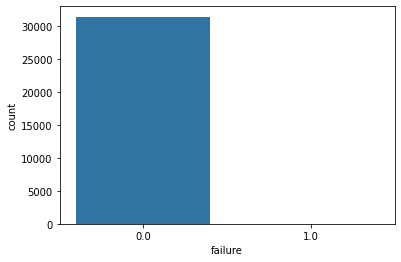

In [ ]:
sns.countplot(df['failure'])

In [ ]:
df['failure'].value_counts()

0.0    31363
1.0       32
Name: failure, dtype: int64

## Distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

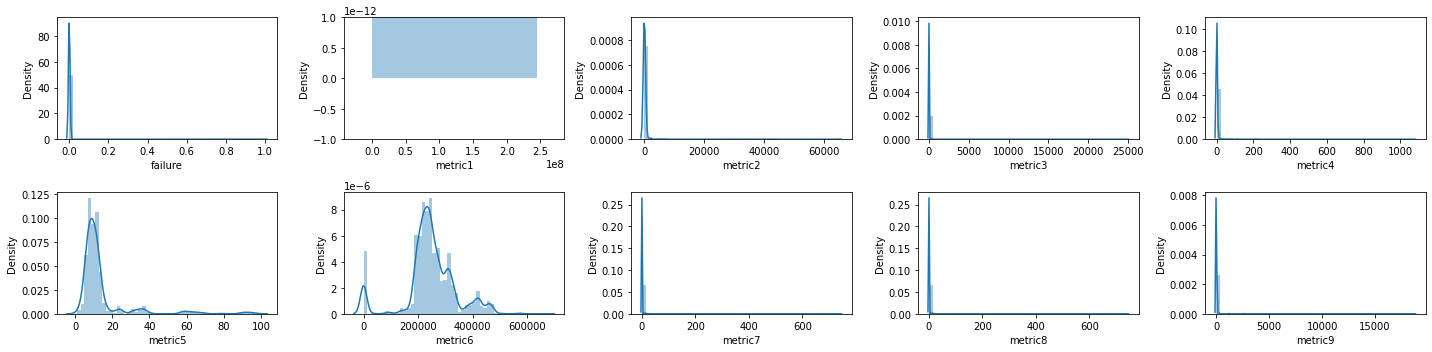

In [ ]:
plt.figure(figsize=(20,5))
plt_num = 1

for col in df.columns:
    if plt_num < 11:
        plt.subplot(2,5,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

## Correlation

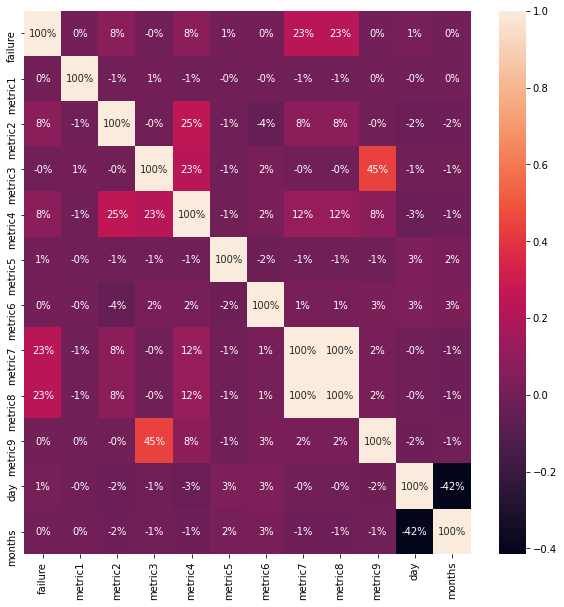

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
df.drop('metric8', axis=1, inplace=True)

#Split into input and output elements

In [ ]:
X = df.iloc[:, 1:]
y = df['failure']

#Building Models using Stratified K-fold CV

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:
skf = StratifiedKFold(n_splits=10)

In [ ]:
def train_model(X, y, model):
    score = 0

    for train_index,test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        score = score + model.score(X_test,y_test)

    print('Mean Accuracy = ', score/10)
    plot_roc_curve(model, X_train,y_train )
    plot_confusion_matrix(model, X_train,y_train)

##Defining our models

In [ ]:
base_model = DummyClassifier(strategy='constant', constant=1)
log_reg_model = LogisticRegression(solver='newton-cg')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100)

##**Baseline Model**

Mean Accuracy =  0.0010192604647104538


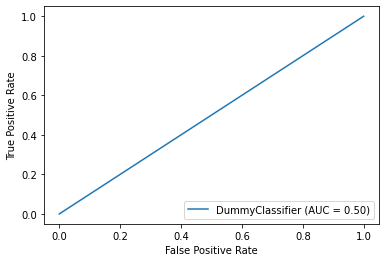

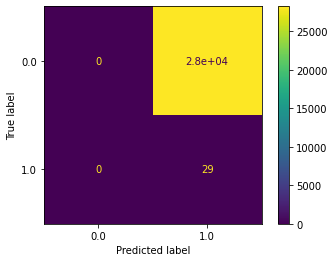

In [ ]:
train_model(X, y, base_model)

##**Logisitic Regression Model**

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Mean Accuracy =  0.9987259624652257


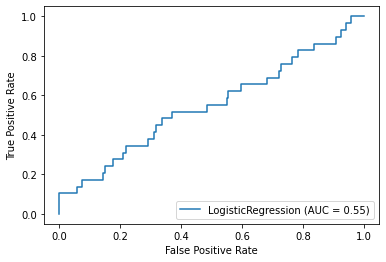

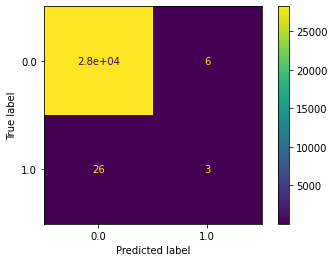

In [ ]:
train_model(X, y, log_reg_model)

##**Decision Tree Model**

Mean Accuracy =  0.9067541084730217


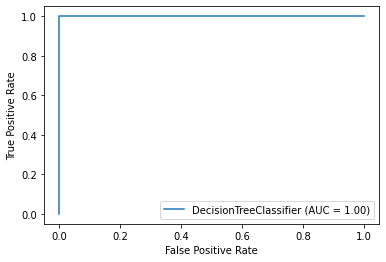

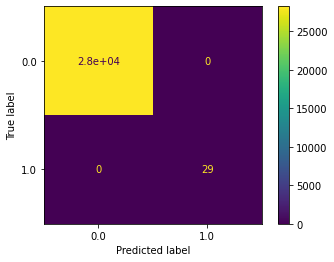

In [ ]:
train_model(X, y, dt_model)

##**Random Forest Model**

Mean Accuracy =  0.9312522142838301


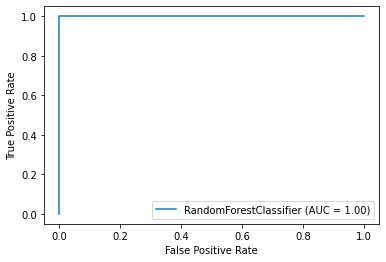

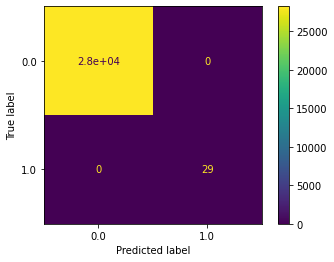

In [ ]:
train_model(X, y, rf_model)